# Mall Customers Analysis — Steps (3) Apply K-Means Clustering

1. **Kmeans Imlementationz**
   - Determine optimal K using the Elbow Method  
   - Choose the optimal K (visually)
  
   - Fit K-Means with optimal K
   - Visualize final clusters in 2D
   - Inspect cluster summary




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import os

In [6]:
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive mode
    BASE_DIR = os.getcwd()

file_path = os.path.join(BASE_DIR, "data", "Mall_Customers_Cleaned.csv")
df = pd.read_csv(file_path)


In [7]:
df.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
income_col = [c for c in df.columns if 'income' in c.lower()][0]
spending_col = [c for c in df.columns if 'spending' in c.lower() or 'score' in c.lower()][0]

X = df[[income_col, spending_col]]
print(f"Selected features: {income_col}, {spending_col}")

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Selected features: Annual Income (k$), Spending Score (1-100)


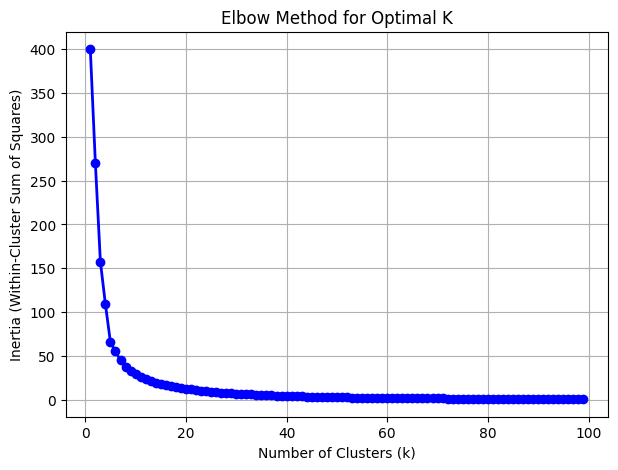

In [10]:
# Determine optimal k using Elbow Method
inertia = []
K_range = range(1, 100)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia, 'bo-', linewidth=2, markersize=6)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [22]:
optimal_k = 5  # Common elbow for Mall dataset
print(f"Chosen optimal number of clusters: k = {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X_scaled)
df['Cluster'] = labels


Chosen optimal number of clusters: k = 5


=== K-Means Evaluation Metrics ===
Inertia (WSS): 65.57
Silhouette Score: 0.5547 (closer to 1 is better)
Calinski-Harabasz Index: 248.65 (higher is better)
Davies-Bouldin Index: 0.5722 (lower is better)


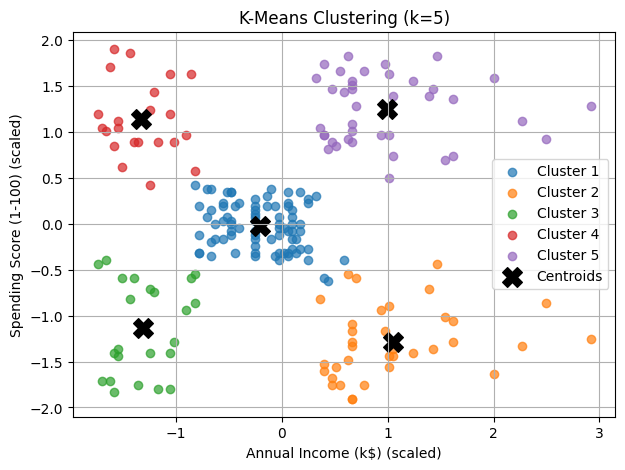

In [26]:
# Evaluation metrics
inertia_final_Kmeans = kmeans_final.inertia_
silhouette_Kmeans = silhouette_score(X_scaled, labels)
calinski_Kmeans = calinski_harabasz_score(X_scaled, labels)
davies_Kmeans = davies_bouldin_score(X_scaled, labels)

print("=== K-Means Evaluation Metrics ===")
print(f"Inertia (WSS): {inertia_final_Kmeans:.2f}")
print(f"Silhouette Score: {silhouette_Kmeans:.4f} (closer to 1 is better)")
print(f"Calinski-Harabasz Index: {calinski_Kmeans:.2f} (higher is better)")
print(f"Davies-Bouldin Index: {davies_Kmeans:.4f} (lower is better)")

# Visualize clusters in 2D
plt.figure(figsize=(7,5))
for cluster in range(optimal_k):
    plt.scatter(
        X_scaled[labels == cluster, 0],
        X_scaled[labels == cluster, 1],
        label=f"Cluster {cluster+1}",
        alpha=0.7
    )

plt.scatter(
    kmeans_final.cluster_centers_[:, 0],
    kmeans_final.cluster_centers_[:, 1],
    c='black', marker='X', s=200, label='Centroids'
)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.xlabel(f"{income_col} (scaled)")
plt.ylabel(f"{spending_col} (scaled)")
plt.legend()
plt.grid(True)
plt.show()